In [263]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
% matplotlib inline

In [265]:
import requests
from io import StringIO

In [266]:
url = 'http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv'
source = requests.get(url).text
poll_data = StringIO(source)

In [267]:
poll_df = pd.read_csv(poll_data)

In [268]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


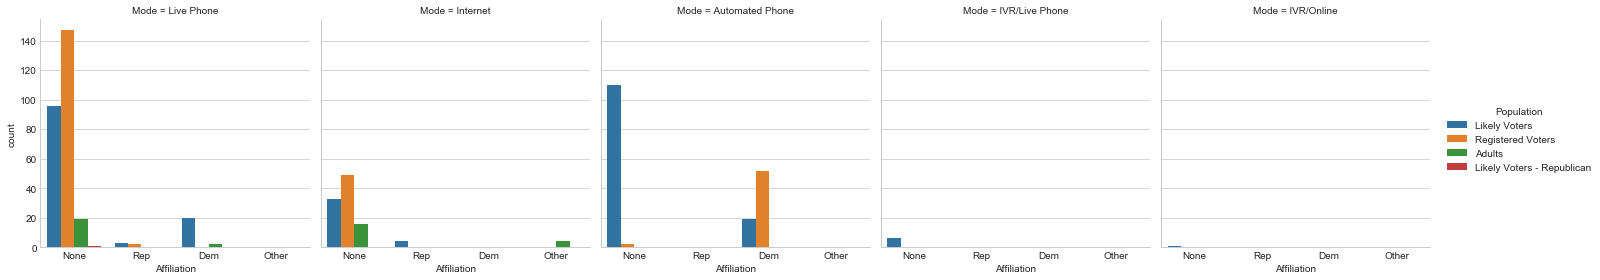

In [269]:
sns.factorplot('Affiliation', data=poll_df, hue='Population', col='Mode', kind='count')

In [270]:
avg = pd.DataFrame(poll_df.mean())
avg.drop('Number of Observations', axis=0, inplace=True)
avg.drop('Question Text', axis=0, inplace=True)
avg.drop('Question Iteration', axis=0, inplace=True)
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations', axis=0, inplace=True)
std.drop('Question Text', axis=0, inplace=True)
std.drop('Question Iteration', axis=0, inplace=True)

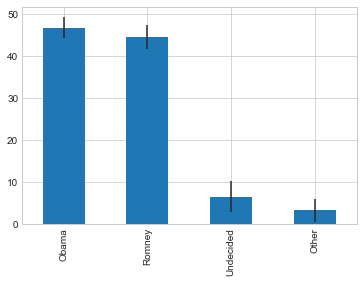

In [271]:
avg.plot(yerr=std, kind='bar', legend=False)

In [272]:
poll_avg = pd.concat([avg,std], axis=1)

In [273]:
poll_avg.columns=['Average','STD']

In [274]:
poll_avg.head()

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726


C:\Users\lewis\Miniconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0,0.5,'Percentage of vote')

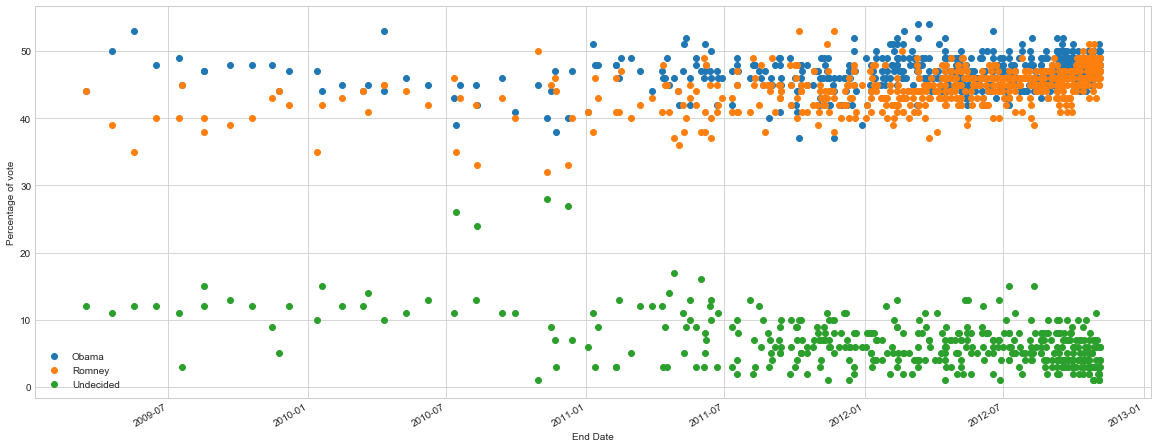

In [275]:
poll_df['End Date'] = pd.to_datetime(poll_df['End Date'], format='%Y-%m-%d')
poll_df.plot(x='End Date', y=['Obama', 'Romney', 'Undecided'], linestyle='', marker='o', figsize=(20,8))
plt.ylabel('Percentage of vote')

In [276]:
from datetime import datetime

In [277]:
poll_df['Differences'] = (poll_df.Obama - poll_df.Romney) / 100
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Differences
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [278]:
poll_df = poll_df.groupby('Start Date', as_index=False).mean()

poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Differences
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


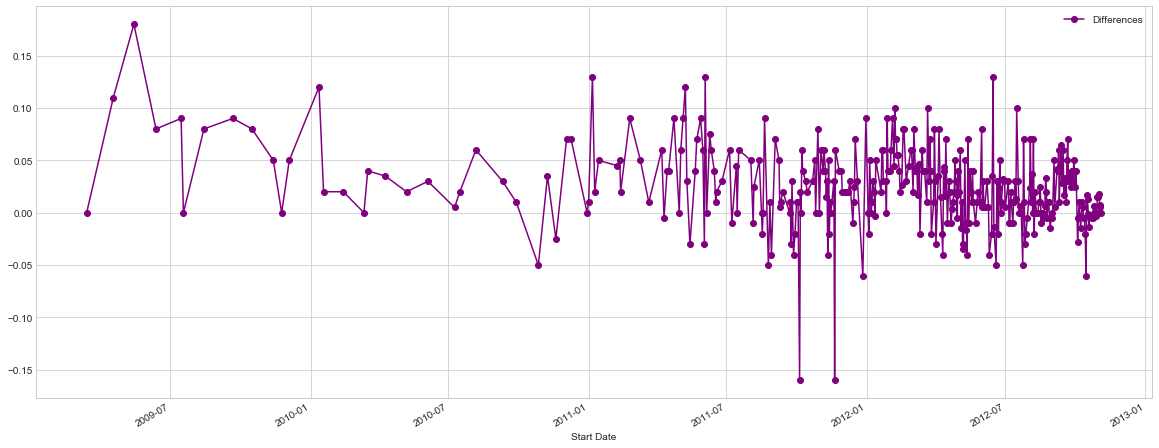

In [279]:
poll_df['Start Date'] = pd.to_datetime(poll_df['Start Date'], format='%Y-%m-%d')
fig = poll_df.plot('Start Date', 'Differences', linestyle='-', marker='o', color='purple', figsize=(20,8))

In [281]:
row_in = 0
xlimit = []

poll_df['Start Date'] = poll_df['Start Date'].astype(str)

for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1

print(min(xlimit))
print(max(xlimit))

325
352


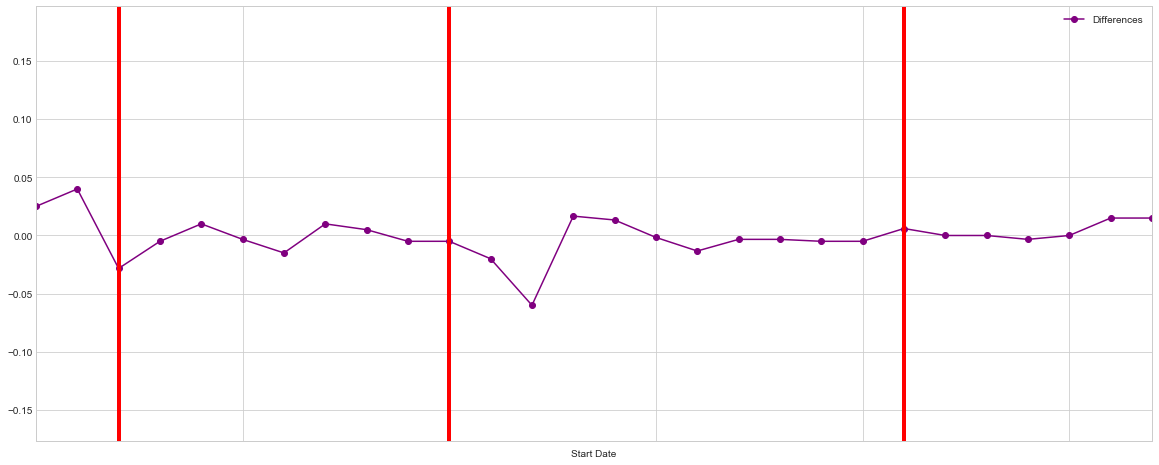

In [282]:
fig = poll_df.plot(x='Start Date', y='Differences', linestyle='-', marker='o', color='purple', figsize=(20,8), xlim=(325, 352))

#Oct 3rd
plt.axvline(x=325+2, linewidth=4, color='r')

#Oct 11th
plt.axvline(x=325+10, linewidth=4, color='r')

#Oct 22nd
plt.axvline(x=325+21, linewidth=4, color='r')

In [283]:
donor_df = pd.read_csv('Election_Donor_Data.csv')

C:\Users\lewis\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [284]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [285]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [287]:
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 174.80          1
 7.27            1
 1219.00         1
 1884.88         1
 162.25          1
 218.31          1
 78.62           1
 203.16          1
 53.11           1
 499.66          1
 19.53           1
 188.60          1
 47.10           1
 19.85           1
 28.83           1
 202.59          1
-5500.00         1
 9.25            1
 202.66          1
 1205.00         1
 80.73           1
 115.07     

In [297]:
# Mean donation
donor_mean = donor_df['contb_receipt_amt'].mean()

#STD donation
donor_std = donor_df['contb_receipt_amt'].std()

#Print average and std
print('The average contribution was ${:.2f} and the standard deviation of contributions was ${:.2f}'.format(donor_mean, donor_std))

The average contribution was $298.22 and the standard deviation of contributions was $3749.67


In [306]:
top_donor = donor_df['contb_receipt_amt'].copy()

top_donor.sort_values(ascending=True, inplace=True)

top_donor

114604      -30800.0
226986      -25800.0
101356       -7500.0
398429       -5500.0
250737       -5455.0
33821        -5414.0
908565       -5115.0
1476         -5000.0
74109        -5000.0
41909        -5000.0
416403       -5000.0
85283        -5000.0
42900        -5000.0
271015       -5000.0
152344       -5000.0
638713       -5000.0
562267       -5000.0
7361         -5000.0
47861        -5000.0
72155        -5000.0
1000914      -5000.0
708899       -5000.0
177422       -5000.0
105674       -5000.0
615101       -5000.0
7973         -5000.0
708920       -5000.0
72040        -5000.0
707945       -5000.0
456649       -5000.0
             ...    
709739       10000.0
90076        10000.0
99829        10000.0
993178       10000.0
708928       10000.0
709813       10000.0
708898       10000.0
710198       10000.0
709268       10000.0
876244       10000.0
708138       10000.0
710177       10000.0
709859       10000.0
710730       10000.0
709608       10000.0
711167       10000.0
91145        

In [308]:
top_donor = top_donor[top_donor > 0]
top_donor.value_counts().head(10)

100.0     178345
50.0      137767
25.0      110792
250.0      91200
500.0      57992
2500.0     49005
35.0       37428
1000.0     36496
10.0       34198
200.0      27856
Name: contb_receipt_amt, dtype: int64

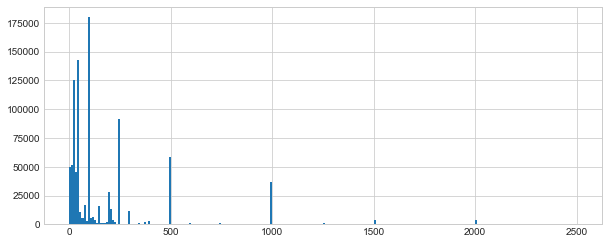

In [310]:
com_don = top_donor[top_donor < 2500]
com_don.hist(bins=250, figsize=(10,4))

In [311]:
candidates=donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [312]:
party_map = {'Bachmann, Michelle':'Republican', 'Romney, Mitt':'Republican', 
        'Obama, Barack':'Democrat',"Roemer, Charles E. 'Buddy' III":'Republican', 
        'Pawlenty, Timothy':'Republican','Johnson, Gary Earl':'Republican', 
        'Paul, Ron':'Republican', 'Santorum, Rick':'Republican',
       'Cain, Herman':'Republican', 'Gingrich, Newt':'Republican', 
        'McCotter, Thaddeus G':'Republican','Huntsman, Jon':'Republican', 
        'Perry, Rick':'Republican'}
donor_df['Party']=donor_df.cand_nm.map(party_map)

In [315]:
# Clear Refunds
donor_df = donor_df[donor_df.contb_receipt_amt > 0]
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [316]:
# Group by candidate and then show the total number of people who donated to each candidate
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46870
Huntsman, Jon                       4066
Johnson, Gary Earl                  1233
McCotter, Thaddeus G                  73
Obama, Barack                     588912
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [318]:
# Group by candidate and then show the total amount received by each candidate
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                  2711420.0
Cain, Herman                        7100739.0
Gingrich, Newt                     12832689.0
Huntsman, Jon                       3330370.0
Johnson, Gary Earl                   566950.0
McCotter, Thaddeus G                  39030.0
Obama, Barack                     135875397.0
Paul, Ron                          20999560.0
Pawlenty, Timothy                   6004809.0
Perry, Rick                        20305706.0
Roemer, Charles E. 'Buddy' III       373001.0
Romney, Mitt                       88335712.0
Santorum, Rick                     11042838.0
Name: contb_receipt_amt, dtype: float64

In [319]:
# Present this information in a for loop to be more readable
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

# Index tracker
i=0

for cand in cand_amount:
    print("The candidate {} raised ${:,}".format(cand_amount.index[i], cand))
    print('\n')
    i+=1

    

The candidate Bachmann, Michelle raised $2,711,420.0


The candidate Cain, Herman raised $7,100,739.0


The candidate Gingrich, Newt raised $12,832,689.0


The candidate Huntsman, Jon raised $3,330,370.0


The candidate Johnson, Gary Earl raised $566,950.0


The candidate McCotter, Thaddeus G raised $39,030.0


The candidate Obama, Barack raised $135,875,397.0


The candidate Paul, Ron raised $20,999,560.0


The candidate Pawlenty, Timothy raised $6,004,809.0


The candidate Perry, Rick raised $20,305,706.0


The candidate Roemer, Charles E. 'Buddy' III raised $373,001.0


The candidate Romney, Mitt raised $88,335,712.0


The candidate Santorum, Rick raised $11,042,838.0




Text(0,0.5,'Amount in 100 millions')

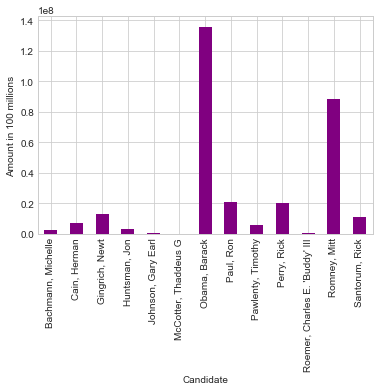

In [321]:
cand_amount.plot(kind='bar', color='purple')
plt.xlabel('Candidate')
plt.ylabel('Amount in 100 millions')

Text(0.5,1,'Graph showing the difference in amounts contributed to each party')

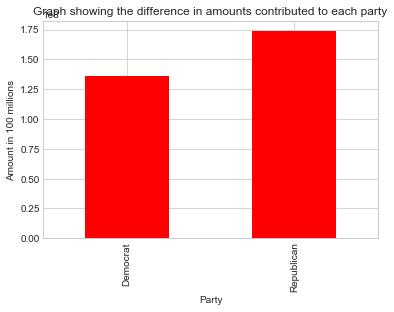

In [323]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar', color='red')
plt.xlabel('Party')
plt.ylabel('Amount in 100 millions')
plt.title('Graph showing the difference in amounts contributed to each party')

In [327]:
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                             index='contbr_occupation',
                             columns='Party', aggfunc='sum')
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [329]:
occupation_df.shape

(45067, 2)

In [330]:
# Cut the dataframe to show only contributions of over 1 million dollars for the sum of an occupation
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

# Check the shape after the changes
occupation_df.shape

(31, 2)

Text(0.5,1,'Plot to show the contributions from each occupation during the 2012 election')

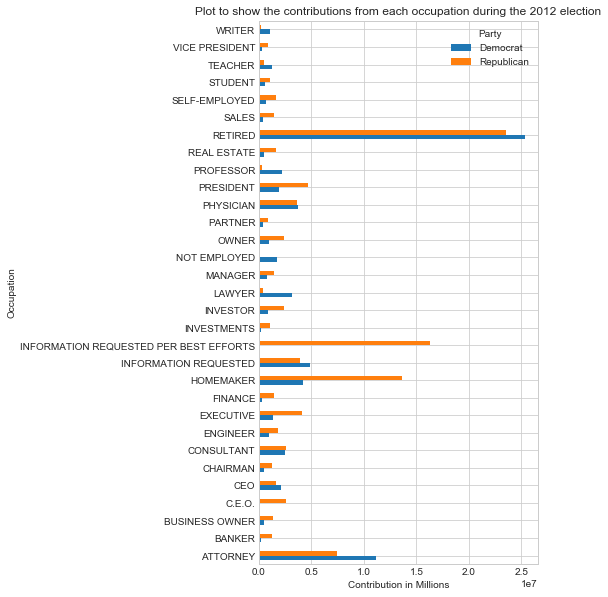

In [339]:
occupation_df.plot(kind='barh', figsize=(5,10))
plt.ylabel('Occupation')
plt.xlabel('Contribution in Millions')
plt.title('Plot to show the contributions from each occupation during the 2012 election')

In [340]:
# Drop unavailable occupations
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS', 'INFORMATION REQUESTED'], axis=0, inplace=True)

In [347]:
# Combine C.E.O. and CEO
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
# Drop the C.E.O. row
occupation_df.drop(['C.E.O.'], axis=0, inplace=True)

Text(0.5,1,'Plot to show the contributions from each occupation during the 2012 election')

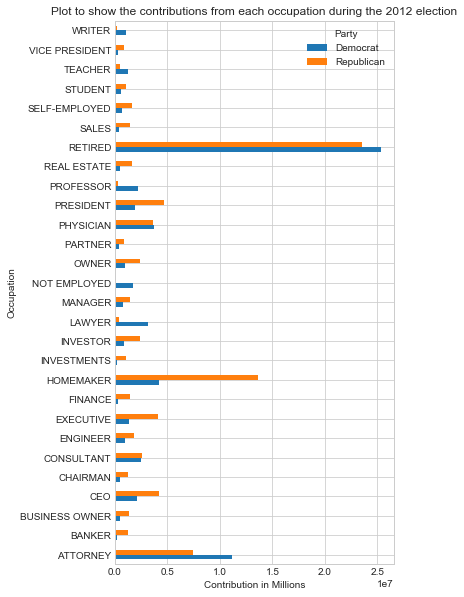

In [348]:
occupation_df.plot(kind='barh', figsize=(5,10))
plt.xlabel('Contribution in Millions')
plt.ylabel('Occupation')
plt.title('Plot to show the contributions from each occupation during the 2012 election')